In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
naic_bound = pd.read_excel('/kaggle/input/naic-bound/NaicExcel.xlsx')
naic_list = pd.read_excel('/kaggle/input/naic-bound/NaicList.xlsx')


In [3]:
# Built Up Areas Affected By Flooding
# BU_HF = Built up High Flooding
# BU_MF = Built up Moderate Flooding
# BU_LF = Built up Low Flooding

# BU_HF_BGY = Built up High Flooding Barangay
# BU_MF_BGY = Built up Moderate Flooding Barangay
# BU_LF_BGY = Built up Low Flooding Barangay

# BU_HF_MUN = Built up High Flooding Municipality
# BU_MF_MUN = Built up Moderate Flooding Municipality
# BU_LF_MUN = Built up Low Flooding Municipality

# Population Affected By Flooding
# POP_HF = Population High Flooding
# POP_MF = Population Moderate Flooding
# POP_LF = Population Low Flooding

# POP_HF_BGY = Population High Flooding Barangay
# POP_MF_BGY = Population Moderate Flooding Barangay
# POP_LF_BGY = Population Low Flooding Barangay

# POP_HF_MUN = Population High Flooding Municipality
# POP_MF_MUN = Population Moderate Flooding Municipality
# POP_LF_MUN = Population Low Flooding Municipality

# Road Networks Affected By Flooding
# RD_HF = Road High Flooding
# RD_MF = Road Moderate Flooding
# RD_LF = Road Low Flooding

# RD_HF_BGY = Road High Flooding Barangay
# RD_MF_BGY = Road Moderate Flooding Barangay
# RD_LF_BGY = Road Low Flooding Barangay

# RD_HF_MUN = Road High Flooding Municipality
# RD_MF_MUN = Road Moderate Flooding Municipality
# RD_LF_MUN = Road Low Flooding Municipality

In [4]:
# DROP THE SHAPE
naic_bound.drop(columns='Shape *', inplace=True)
naic_list.drop(columns='Shape *', inplace=True)

In [5]:
naic_bound.head()

,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area
0,20,0,Bagong Karsada,0.015467,0.000012,65319.6
1,0,0,Balsahan,0.008651,0.000003,14575.0
2,21,0,Bancaan,0.037627,0.000041,144597.0
3,22,0,Bucana Malaki,0.025336,0.000019,60095.1
4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0


In [6]:
naic_list.head()

,FID,Name_1,FloodSusc,Name,Area
0,0,Bagong Karsada,HF,Bagong Karsada,64259.500
1,1,Bagong Karsada,VHF,Bagong Karsada,1060.120
2,2,Balsahan,HF,Balsahan,4205.610
3,3,Balsahan,MF,Balsahan,9827.540
4,4,Balsahan,VHF,Balsahan,541.832


In [7]:
# FILTER BARANGAYS BY FLOOD SUSCEPTABLITY

naic_vhf = naic_list[naic_list['FloodSusc'] == 'VHF']
naic_hf = naic_list[naic_list['FloodSusc'] == 'HF']
naic_mf = naic_list[naic_list['FloodSusc'] == 'MF']
naic_lf = naic_list[naic_list['FloodSusc'] == 'LF']

In [8]:
# CHANGE THE COLUMN NAME OF AREA TO AREA SUSCEPTABILITY

naic_vhf = naic_vhf.rename(columns={'Area':'Area_VHF'})
naic_hf = naic_hf.rename(columns={'Area':'Area_HF'})
naic_mf = naic_mf.rename(columns={'Area':'Area_MF'})
naic_lf = naic_lf.rename(columns={'Area':'Area_LF'})


In [9]:
naic_vhf.head()

,FID,Name_1,FloodSusc,Name,Area_VHF
1,1,Bagong Karsada,VHF,Bagong Karsada,1060.120
4,4,Balsahan,VHF,Balsahan,541.832
8,8,Bancaan,VHF,Bancaan,928.310
10,10,Bucana Malaki,VHF,Bucana Malaki,208.957
13,13,Bucana Sasahan,VHF,Bucana Sasahan,332.583


In [10]:
naic_hf.head()

,FID,Name_1,FloodSusc,Name,Area_HF
0,0,Bagong Karsada,HF,Bagong Karsada,64259.50
2,2,Balsahan,HF,Balsahan,4205.61
5,5,Bancaan,HF,Bancaan,55619.50
9,9,Bucana Malaki,HF,Bucana Malaki,59886.20
11,11,Bucana Sasahan,HF,Bucana Sasahan,120576.00


In [11]:
naic_mf.head()

,FID,Name_1,FloodSusc,Name,Area_MF
3,3,Balsahan,MF,Balsahan,9827.540
7,7,Bancaan,MF,Bancaan,82200.100
12,12,Bucana Sasahan,MF,Bucana Sasahan,411.405
16,16,Calubcob,MF,Calubcob,4870.360
20,20,Capt. C. Nazareno (Pob.),MF,Capt. C. Nazareno (Pob.),49759.700


In [12]:
naic_lf.head()

,FID,Name_1,FloodSusc,Name,Area_LF
6,6,Bancaan,LF,Bancaan,5848.940
15,15,Calubcob,LF,Calubcob,132008.000
19,19,Capt. C. Nazareno (Pob.),LF,Capt. C. Nazareno (Pob.),362.316
26,26,Halang,LF,Halang,399931.000
29,29,Humbac,LF,Humbac,2499.910


In [13]:
# CONCAT ALL TYPES OF FLOODSUSCEPTIBILITY

area_list_concat = pd.concat([naic_vhf, naic_hf, naic_mf, naic_lf], axis=0, join='outer')

area_list_concat

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,FID,Name_1,FloodSusc,Name,Area_VHF,Area_HF,Area_MF,Area_LF
1,1,Bagong Karsada,VHF,Bagong Karsada,1060.120,NaN,NaN,NaN
4,4,Balsahan,VHF,Balsahan,541.832,NaN,NaN,NaN
8,8,Bancaan,VHF,Bancaan,928.310,NaN,NaN,NaN
10,10,Bucana Malaki,VHF,Bucana Malaki,208.957,NaN,NaN,NaN
13,13,Bucana Sasahan,VHF,Bucana Sasahan,332.583,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
87,87,San Roque,LF,San Roque,NaN,NaN,NaN,103245.00
91,91,Santulan,LF,Santulan,NaN,NaN,NaN,6306.28
95,95,Sapa,LF,Sapa,NaN,NaN,NaN,24054.00
99,99,Timalan Balsahan,LF,Timalan Balsahan,NaN,NaN,NaN,801487.00


In [14]:
# FILL ALL NA WITH 0

area_fillNA = area_list_concat.fillna(0)

area_fillNA

,FID,Name_1,FloodSusc,Name,Area_VHF,Area_HF,Area_MF,Area_LF
1,1,Bagong Karsada,VHF,Bagong Karsada,1060.120,0.0,0.0,0.00
4,4,Balsahan,VHF,Balsahan,541.832,0.0,0.0,0.00
8,8,Bancaan,VHF,Bancaan,928.310,0.0,0.0,0.00
10,10,Bucana Malaki,VHF,Bucana Malaki,208.957,0.0,0.0,0.00
13,13,Bucana Sasahan,VHF,Bucana Sasahan,332.583,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...
87,87,San Roque,LF,San Roque,0.000,0.0,0.0,103245.00
91,91,Santulan,LF,Santulan,0.000,0.0,0.0,6306.28
95,95,Sapa,LF,Sapa,0.000,0.0,0.0,24054.00
99,99,Timalan Balsahan,LF,Timalan Balsahan,0.000,0.0,0.0,801487.00


In [15]:
# GROUP BY BARANGAY NAME

area_list_grouped = area_fillNA.groupby('Name').sum()

print(area_list_grouped.head())

print(area_list_grouped.shape)

                FID                                      Name_1  FloodSusc  \
Name                                                                         
Bagong Karsada    1                Bagong KarsadaBagong Karsada      VHFHF   
Balsahan          9                    BalsahanBalsahanBalsahan    VHFHFMF   
Bancaan          26                BancaanBancaanBancaanBancaan  VHFHFMFLF   
Bucana Malaki    19                  Bucana MalakiBucana Malaki      VHFHF   
Bucana Sasahan   36  Bucana SasahanBucana SasahanBucana Sasahan    VHFHFMF   

                Area_VHF    Area_HF    Area_MF  Area_LF  
Name                                                     
Bagong Karsada  1060.120   64259.50      0.000     0.00  
Balsahan         541.832    4205.61   9827.540     0.00  
Bancaan          928.310   55619.50  82200.100  5848.94  
Bucana Malaki    208.957   59886.20      0.000     0.00  
Bucana Sasahan   332.583  120576.00    411.405     0.00  
(30, 7)


In [16]:
# DROPED COLUMNS THAT'S NOT NEEDED

area_list = area_list_grouped.drop(['FID', 'FloodSusc', 'Name_1'], axis=1)

print(area_list.head())

print(area_list.shape)

                Area_VHF    Area_HF    Area_MF  Area_LF
Name                                                   
Bagong Karsada  1060.120   64259.50      0.000     0.00
Balsahan         541.832    4205.61   9827.540     0.00
Bancaan          928.310   55619.50  82200.100  5848.94
Bucana Malaki    208.957   59886.20      0.000     0.00
Bucana Sasahan   332.583  120576.00    411.405     0.00
(30, 4)


In [17]:
bu_HF = (area_list['Area_VHF'] + area_list['Area_HF']).to_frame('AREA_HF')

print(bu_HF.head())

                   AREA_HF
Name                      
Bagong Karsada   65319.620
Balsahan          4747.442
Bancaan          56547.810
Bucana Malaki    60095.157
Bucana Sasahan  120908.583


In [18]:
naic_list_final = area_list.drop('Area_VHF', axis=1)
print(naic_list_final.head())

                  Area_HF    Area_MF  Area_LF
Name                                         
Bagong Karsada   64259.50      0.000     0.00
Balsahan          4205.61   9827.540     0.00
Bancaan          55619.50  82200.100  5848.94
Bucana Malaki    59886.20      0.000     0.00
Bucana Sasahan  120576.00    411.405     0.00


In [19]:
naic_list_final['Area_HF'] = bu_HF['AREA_HF']

In [20]:
print(naic_list_final.head())

                   Area_HF    Area_MF  Area_LF
Name                                          
Bagong Karsada   65319.620      0.000     0.00
Balsahan          4747.442   9827.540     0.00
Bancaan          56547.810  82200.100  5848.94
Bucana Malaki    60095.157      0.000     0.00
Bucana Sasahan  120908.583    411.405     0.00


In [21]:
print(naic_bound.head())

   FID  OID_            Name  Shape_Leng  Shape_Area   BU_Area
0   20     0  Bagong Karsada    0.015467    0.000012   65319.6
1    0     0        Balsahan    0.008651    0.000003   14575.0
2   21     0         Bancaan    0.037627    0.000041  144597.0
3   22     0   Bucana Malaki    0.025336    0.000019   60095.1
4   23     0  Bucana Sasahan    0.038879    0.000057  121320.0


In [22]:
# MERGE AREA BOUND TO AREA LIST

print(naic_bound.shape)
print(naic_list_final.shape)

naic_bound_merge = naic_bound.merge(naic_list_final, on='Name', how='inner')

naic_bound_final = naic_bound_merge.sort_values('Name')

print(naic_bound_final.head())
print(naic_bound_final.shape)

(30, 6)
(30, 3)
   FID  OID_            Name  Shape_Leng  Shape_Area   BU_Area     Area_HF  \
0   20     0  Bagong Karsada    0.015467    0.000012   65319.6   65319.620   
1    0     0        Balsahan    0.008651    0.000003   14575.0    4747.442   
2   21     0         Bancaan    0.037627    0.000041  144597.0   56547.810   
3   22     0   Bucana Malaki    0.025336    0.000019   60095.1   60095.157   
4   23     0  Bucana Sasahan    0.038879    0.000057  121320.0  120908.583   

     Area_MF  Area_LF  
0      0.000     0.00  
1   9827.540     0.00  
2  82200.100  5848.94  
3      0.000     0.00  
4    411.405     0.00  
(30, 9)


In [23]:
naic_bound_final.head()

,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area,Area_HF,Area_MF,Area_LF
0,20,0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00
1,0,0,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00
2,21,0,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94
3,22,0,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00
4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00


In [24]:
# CHANGE COLUMN OF AREAS SUSCEPTIBILITY TO BUILT UP

naic_bound_final = naic_bound_final.rename(columns={'Area_HF': 'BU_HF','Area_MF': 'BU_MF', 'Area_LF': 'BU_LF'})

print(naic_bound_final.head())

   FID  OID_            Name  Shape_Leng  Shape_Area   BU_Area       BU_HF  \
0   20     0  Bagong Karsada    0.015467    0.000012   65319.6   65319.620   
1    0     0        Balsahan    0.008651    0.000003   14575.0    4747.442   
2   21     0         Bancaan    0.037627    0.000041  144597.0   56547.810   
3   22     0   Bucana Malaki    0.025336    0.000019   60095.1   60095.157   
4   23     0  Bucana Sasahan    0.038879    0.000057  121320.0  120908.583   

       BU_MF    BU_LF  
0      0.000     0.00  
1   9827.540     0.00  
2  82200.100  5848.94  
3      0.000     0.00  
4    411.405     0.00  


In [25]:
# COMPUTING PERCENTAGE OF BUILT UP AREA PER SUSCEPTIBILITY PER BARANGAY

naic_bound_final['BU_HF_BGY'] = naic_bound_final['BU_HF'] / naic_bound_final['BU_Area']
naic_bound_final['BU_MF_BGY'] = naic_bound_final['BU_MF'] / naic_bound_final['BU_Area']
naic_bound_final['BU_LF_BGY'] = naic_bound_final['BU_LF'] / naic_bound_final['BU_Area']

naic_bound_final.head()


,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area,BU_HF,BU_MF,BU_LF,BU_HF_BGY,BU_MF_BGY,BU_LF_BGY
0,20,0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00,1.000000,0.000000,0.00000
1,0,0,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00,0.325725,0.674274,0.00000
2,21,0,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94,0.391072,0.568477,0.04045
3,22,0,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00,1.000001,0.000000,0.00000
4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00,0.996609,0.003391,0.00000


In [26]:
# SUM OF BUILT UP AREAS

sum_bu = naic_bound_final['BU_Area'].sum()

print(sum_bu)

6671329.899999999


In [27]:
naic_bound_final['BU_HF_MUN'] = naic_bound_final['BU_HF'] / sum_bu
naic_bound_final['BU_MF_MUN'] = naic_bound_final['BU_MF'] / sum_bu
naic_bound_final['BU_LF_MUN'] = naic_bound_final['BU_LF'] / sum_bu

naic_bound_final.head()

,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area,BU_HF,BU_MF,BU_LF,BU_HF_BGY,BU_MF_BGY,BU_LF_BGY,BU_HF_MUN,BU_MF_MUN,BU_LF_MUN
0,20,0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00,1.000000,0.000000,0.00000,0.009791,0.000000,0.000000
1,0,0,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00,0.325725,0.674274,0.00000,0.000712,0.001473,0.000000
2,21,0,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94,0.391072,0.568477,0.04045,0.008476,0.012321,0.000877
3,22,0,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00,1.000001,0.000000,0.00000,0.009008,0.000000,0.000000
4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00,0.996609,0.003391,0.00000,0.018124,0.000062,0.000000


In [28]:
# SAVE FILE
# naic_bound_final.to_csv('/kaggle/working/naic_bound_final.csv')

In [29]:
naic_pop = pd.read_excel('/kaggle/input/naic-bound/Naic Population.xlsx')

print(naic_pop.head())
print(naic_pop.shape)

             Name Urban/Rural  Population
0  Bagong Karsada       Rural        2067
1        Balsahan       Rural         422
2         Bancaan       Rural        4836
3   Bucana Malaki       Rural        1356
4  Bucana Sasahan       Urban        5960
(30, 3)


In [30]:
naic_pop_bound = naic_bound_final.merge(naic_pop, on='Name', how='inner')

naic_pop_bound.head()

,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area,BU_HF,BU_MF,BU_LF,BU_HF_BGY,BU_MF_BGY,BU_LF_BGY,BU_HF_MUN,BU_MF_MUN,BU_LF_MUN,Urban/Rural,Population
0,20,0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00,1.000000,0.000000,0.00000,0.009791,0.000000,0.000000,Rural,2067
1,0,0,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00,0.325725,0.674274,0.00000,0.000712,0.001473,0.000000,Rural,422
2,21,0,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94,0.391072,0.568477,0.04045,0.008476,0.012321,0.000877,Rural,4836
3,22,0,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00,1.000001,0.000000,0.00000,0.009008,0.000000,0.000000,Rural,1356
4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00,0.996609,0.003391,0.00000,0.018124,0.000062,0.000000,Urban,5960


In [31]:
# ADD COLUMN FIELD POPULATION DENSITY

naic_pop_bound['POP_DEN'] = naic_pop_bound['Population'] / naic_pop_bound['BU_Area']

naic_pop_bound.head()

,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area,BU_HF,BU_MF,BU_LF,BU_HF_BGY,BU_MF_BGY,BU_LF_BGY,BU_HF_MUN,BU_MF_MUN,BU_LF_MUN,Urban/Rural,Population,POP_DEN
0,20,0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00,1.000000,0.000000,0.00000,0.009791,0.000000,0.000000,Rural,2067,0.031644
1,0,0,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00,0.325725,0.674274,0.00000,0.000712,0.001473,0.000000,Rural,422,0.028954
2,21,0,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94,0.391072,0.568477,0.04045,0.008476,0.012321,0.000877,Rural,4836,0.033445
3,22,0,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00,1.000001,0.000000,0.00000,0.009008,0.000000,0.000000,Rural,1356,0.022564
4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00,0.996609,0.003391,0.00000,0.018124,0.000062,0.000000,Urban,5960,0.049126


In [32]:
# COMPUTE FOR POPULATION PER SUSCEPTIBILITY

naic_pop_bound['POP_HF'] = naic_pop_bound['POP_DEN'] * naic_pop_bound['BU_HF']
naic_pop_bound['POP_MF'] = naic_pop_bound['POP_DEN'] * naic_pop_bound['BU_MF']
naic_pop_bound['POP_LF'] = naic_pop_bound['POP_DEN'] * naic_pop_bound['BU_LF']

naic_pop_bound.head()


,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area,BU_HF,BU_MF,BU_LF,BU_HF_BGY,...,BU_LF_BGY,BU_HF_MUN,BU_MF_MUN,BU_LF_MUN,Urban/Rural,Population,POP_DEN,POP_HF,POP_MF,POP_LF
0,20,0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00,1.000000,...,0.00000,0.009791,0.000000,0.000000,Rural,2067,0.031644,2067.000633,0.000000,0.000000
1,0,0,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00,0.325725,...,0.00000,0.000712,0.001473,0.000000,Rural,422,0.028954,137.455954,284.543525,0.000000
2,21,0,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94,0.391072,...,0.04045,0.008476,0.012321,0.000877,Rural,4836,0.033445,1891.223256,2749.155817,195.615911
3,22,0,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00,1.000001,...,0.00000,0.009008,0.000000,0.000000,Rural,1356,0.022564,1356.001286,0.000000,0.000000
4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00,0.996609,...,0.00000,0.018124,0.000062,0.000000,Urban,5960,0.049126,5939.788614,20.210796,0.000000


In [33]:
# COMPUTE FOR POPULATION PER SUSCEPTIBILITY PER BARANGGAY

naic_pop_bound['POP_HF_BGY'] = naic_pop_bound['POP_HF'] / naic_pop_bound['Population']
naic_pop_bound['POP_MF_BGY'] = naic_pop_bound['POP_MF'] / naic_pop_bound['Population']
naic_pop_bound['POP_LF_BGY'] = naic_pop_bound['POP_LF'] / naic_pop_bound['Population']

naic_pop_bound.head()

,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area,BU_HF,BU_MF,BU_LF,BU_HF_BGY,...,BU_LF_MUN,Urban/Rural,Population,POP_DEN,POP_HF,POP_MF,POP_LF,POP_HF_BGY,POP_MF_BGY,POP_LF_BGY
0,20,0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00,1.000000,...,0.000000,Rural,2067,0.031644,2067.000633,0.000000,0.000000,1.000000,0.000000,0.00000
1,0,0,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00,0.325725,...,0.000000,Rural,422,0.028954,137.455954,284.543525,0.000000,0.325725,0.674274,0.00000
2,21,0,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94,0.391072,...,0.000877,Rural,4836,0.033445,1891.223256,2749.155817,195.615911,0.391072,0.568477,0.04045
3,22,0,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00,1.000001,...,0.000000,Rural,1356,0.022564,1356.001286,0.000000,0.000000,1.000001,0.000000,0.00000
4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00,0.996609,...,0.000000,Urban,5960,0.049126,5939.788614,20.210796,0.000000,0.996609,0.003391,0.00000


In [34]:
sum_pop = naic_pop_bound['Population'].sum()

print(sum_pop)

160987


In [35]:
# COMPUTE FOR POPULATION PER SUSCEPTIBILITY IN MUNICIPALITY

naic_pop_bound['POP_HF_MUN'] = naic_pop_bound['POP_HF'] / sum_pop
naic_pop_bound['POP_MF_MUN'] = naic_pop_bound['POP_MF'] / sum_pop
naic_pop_bound['POP_LF_MUN'] = naic_pop_bound['POP_LF'] / sum_pop

naic_pop_bound.head()

,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area,BU_HF,BU_MF,BU_LF,BU_HF_BGY,...,POP_DEN,POP_HF,POP_MF,POP_LF,POP_HF_BGY,POP_MF_BGY,POP_LF_BGY,POP_HF_MUN,POP_MF_MUN,POP_LF_MUN
0,20,0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00,1.000000,...,0.031644,2067.000633,0.000000,0.000000,1.000000,0.000000,0.00000,0.012840,0.000000,0.000000
1,0,0,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00,0.325725,...,0.028954,137.455954,284.543525,0.000000,0.325725,0.674274,0.00000,0.000854,0.001767,0.000000
2,21,0,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94,0.391072,...,0.033445,1891.223256,2749.155817,195.615911,0.391072,0.568477,0.04045,0.011748,0.017077,0.001215
3,22,0,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00,1.000001,...,0.022564,1356.001286,0.000000,0.000000,1.000001,0.000000,0.00000,0.008423,0.000000,0.000000
4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00,0.996609,...,0.049126,5939.788614,20.210796,0.000000,0.996609,0.003391,0.00000,0.036896,0.000126,0.000000


In [36]:
# SAVE FILE
naic_pop_bound.to_csv('/kaggle/working/naic_bu_pop_final.csv')

In [37]:
naic_road_1 = pd.read_excel('/kaggle/input/naic-bound/NaicRdExcel.xlsx')

print(naic_road_1.head())
print(naic_road_1.shape)

   FID      Shape *          Name_1 FloodSusc    RdHazRat
0    0  Polyline ZM  Bagong Karsada        HF   773.30900
1    1  Polyline ZM        Balsahan        HF    36.63650
2    2  Polyline ZM        Balsahan        MF   249.73000
3    3  Polyline ZM        Balsahan       VHF     6.34593
4    4  Polyline ZM         Bancaan        HF  1416.98000
(99, 5)


In [38]:
naic_road_1 = naic_road_1.rename(columns={'Name_1': 'Name'})

naic_road_1 = naic_road_1.drop(['FID', 'Shape *'], axis=1)



In [39]:
print(naic_road_1.head())
print(naic_road_1.shape)

             Name FloodSusc    RdHazRat
0  Bagong Karsada        HF   773.30900
1        Balsahan        HF    36.63650
2        Balsahan        MF   249.73000
3        Balsahan       VHF     6.34593
4         Bancaan        HF  1416.98000
(99, 3)


In [40]:
naic_r_VHF = naic_road_1[naic_road_1['FloodSusc'] == 'VHF']
naic_r_HF = naic_road_1[naic_road_1['FloodSusc'] == 'HF']
naic_r_MF = naic_road_1[naic_road_1['FloodSusc'] == 'MF']
naic_r_LF = naic_road_1[naic_road_1['FloodSusc'] == 'LF']

print(naic_r_VHF.shape)
print(naic_r_HF.shape)
print(naic_r_MF.shape)
print(naic_r_LF.shape)

(19, 3)
(30, 3)
(28, 3)
(22, 3)


In [41]:
naic_r_VHF = naic_r_VHF.rename(columns={'RdHazRat': 'Length_VHF'})
naic_r_HF = naic_r_HF.rename(columns={'RdHazRat': 'Length_HF'})
naic_r_MF = naic_r_MF.rename(columns={'RdHazRat': 'Length_MF'})
naic_r_LF = naic_r_LF.rename(columns={'RdHazRat': 'Length_LF'})

In [42]:
naic_r_VHF.head()
naic_r_HF.head()
naic_r_MF.head()
naic_r_LF.head()


,Name,FloodSusc,Length_LF
10,Calubcob,LF,11726.1000
19,Halang,LF,32902.3000
23,Humbac,LF,74.1055
26,Ibayo Estacion,LF,5824.9700
30,Ibayo Silangan,LF,19705.8000


In [43]:
# CONCAT ALL ROAD BASED ON SUSCEPTIBILITY

naic_r_concat = pd.concat([naic_r_VHF, naic_r_HF, naic_r_MF, naic_r_LF], axis=0, join='outer' )

naic_r_concat

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,FloodSusc,Length_VHF,Length_HF,Length_MF,Length_LF
3,Balsahan,VHF,6.34593,NaN,NaN,NaN
12,Calubcob,VHF,3.41349,NaN,NaN,NaN
17,Gomez-Zamora (Pob.),VHF,29.16940,NaN,NaN,NaN
21,Halang,VHF,9.49766,NaN,NaN,NaN
28,Ibayo Estacion,VHF,197.98600,NaN,NaN,NaN
...,...,...,...,...,...,...
82,San Roque,LF,NaN,NaN,NaN,8099.080
86,Santulan,LF,NaN,NaN,NaN,248.029
89,Sapa,LF,NaN,NaN,NaN,6671.500
93,Timalan Balsahan,LF,NaN,NaN,NaN,75436.500


In [44]:
# GROUP BY BARANGAY NAME

naic_road_grouped = naic_r_concat.groupby('Name').sum()

print(naic_road_grouped.head())
print(naic_road_grouped.shape)

               FloodSusc  Length_VHF  Length_HF  Length_MF  Length_LF
Name                                                                 
Bagong Karsada        HF     0.00000   773.3090     0.0000        0.0
Balsahan         VHFHFMF     6.34593    36.6365   249.7300        0.0
Bancaan             HFMF     0.00000  1416.9800  1255.4400        0.0
Bucana Malaki         HF     0.00000   935.2480     0.0000        0.0
Bucana Sasahan      HFMF     0.00000  4198.3300    16.3036        0.0
(30, 5)


In [45]:
naic_r_final = (naic_road_grouped['Length_VHF'] + naic_road_grouped['Length_HF']).to_frame('Length_HF')

naic_r_final.head()



,Length_HF
Name,
Bagong Karsada,773.30900
Balsahan,42.98243
Bancaan,1416.98000
Bucana Malaki,935.24800
Bucana Sasahan,4198.33000


In [46]:
naic_rd = naic_road_grouped

naic_rd.tail()

,FloodSusc,Length_VHF,Length_HF,Length_MF,Length_LF
Name,,,,,
San Roque,VHFHFMFLF,21.2656,77.6816,861.704,8099.080
Santulan,HFMFLF,0.0000,131.9110,473.152,248.029
Sapa,VHFHFMFLF,23.6131,353.9830,417.985,6671.500
Timalan Balsahan,VHFHFMFLF,378.4510,5078.0800,2628.820,75436.500
Timalan Concepcion,HFMFLF,0.0000,333.5290,878.525,7889.480


In [47]:
naic_rd = naic_rd.drop(columns=['FloodSusc' ,'Length_VHF'], axis=1)

In [48]:
naic_rd.tail()

,Length_HF,Length_MF,Length_LF
Name,,,
San Roque,77.6816,861.704,8099.080
Santulan,131.9110,473.152,248.029
Sapa,353.9830,417.985,6671.500
Timalan Balsahan,5078.0800,2628.820,75436.500
Timalan Concepcion,333.5290,878.525,7889.480


In [49]:
naic_rd['Length_HF'] = naic_r_final['Length_HF']

naic_rd.tail()

,Length_HF,Length_MF,Length_LF
Name,,,
San Roque,98.9472,861.704,8099.080
Santulan,131.9110,473.152,248.029
Sapa,377.5961,417.985,6671.500
Timalan Balsahan,5456.5310,2628.820,75436.500
Timalan Concepcion,333.5290,878.525,7889.480


In [50]:
naic_rd.shape

(30, 3)

In [51]:
naic_pop1 = pd.read_csv('/kaggle/working/naic_bu_pop_final.csv')

naic_pop1.head()

,Unnamed: 0,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area,BU_HF,BU_MF,BU_LF,...,POP_DEN,POP_HF,POP_MF,POP_LF,POP_HF_BGY,POP_MF_BGY,POP_LF_BGY,POP_HF_MUN,POP_MF_MUN,POP_LF_MUN
0,0,20,0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00,...,0.031644,2067.000633,0.000000,0.000000,1.000000,0.000000,0.00000,0.012840,0.000000,0.000000
1,1,0,0,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00,...,0.028954,137.455954,284.543525,0.000000,0.325725,0.674274,0.00000,0.000854,0.001767,0.000000
2,2,21,0,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94,...,0.033445,1891.223256,2749.155817,195.615911,0.391072,0.568477,0.04045,0.011748,0.017077,0.001215
3,3,22,0,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00,...,0.022564,1356.001286,0.000000,0.000000,1.000001,0.000000,0.00000,0.008423,0.000000,0.000000
4,4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00,...,0.049126,5939.788614,20.210796,0.000000,0.996609,0.003391,0.00000,0.036896,0.000126,0.000000


In [52]:
print(naic_rd.head())

                 Length_HF  Length_MF  Length_LF
Name                                            
Bagong Karsada   773.30900     0.0000        0.0
Balsahan          42.98243   249.7300        0.0
Bancaan         1416.98000  1255.4400        0.0
Bucana Malaki    935.24800     0.0000        0.0
Bucana Sasahan  4198.33000    16.3036        0.0


In [53]:
naic_rd_pop = naic_pop1.merge(naic_rd, on='Name', how='inner')

print(naic_rd_pop.head())
print(naic_rd_pop.shape)

   Unnamed: 0  FID  OID_            Name  Shape_Leng  Shape_Area   BU_Area  \
0           0   20     0  Bagong Karsada    0.015467    0.000012   65319.6   
1           1    0     0        Balsahan    0.008651    0.000003   14575.0   
2           2   21     0         Bancaan    0.037627    0.000041  144597.0   
3           3   22     0   Bucana Malaki    0.025336    0.000019   60095.1   
4           4   23     0  Bucana Sasahan    0.038879    0.000057  121320.0   

        BU_HF      BU_MF    BU_LF  ...      POP_LF  POP_HF_BGY  POP_MF_BGY  \
0   65319.620      0.000     0.00  ...    0.000000    1.000000    0.000000   
1    4747.442   9827.540     0.00  ...    0.000000    0.325725    0.674274   
2   56547.810  82200.100  5848.94  ...  195.615911    0.391072    0.568477   
3   60095.157      0.000     0.00  ...    0.000000    1.000001    0.000000   
4  120908.583    411.405     0.00  ...    0.000000    0.996609    0.003391   

   POP_LF_BGY  POP_HF_MUN  POP_MF_MUN POP_LF_MUN   Length_HF  

In [54]:
length_rd = (naic_rd_pop['Length_HF'] + naic_rd_pop['Length_MF']+ naic_rd_pop['Length_LF']).to_frame('Length_RD')

print(length_rd)

       Length_RD
0      773.30900
1      292.71243
2     2672.42000
3      935.24800
4     4214.63360
5    12602.96049
6     1287.78900
7     1091.65900
8    34975.46766
9      524.35980
10    6301.26610
11   20570.36950
12    1975.79880
13    7629.76070
14    1935.21000
15    4327.53160
16    2442.70260
17   37574.66750
18   32864.41330
19   33318.40400
20   12509.57220
21   12278.05050
22    7651.48750
23   35036.06800
24  120833.17000
25    9059.73120
26     853.09200
27    7467.08110
28   83521.85100
29    9101.53400


In [55]:
naic_rd_pop['Length_RD'] = length_rd['Length_RD']

print(naic_rd_pop.tail())

    Unnamed: 0  FID  OID_                Name  Shape_Leng  Shape_Area  \
25          25   17     0           San Roque    0.087901    0.000156   
26          26   18     0            Santulan    0.012554    0.000005   
27          27   28     0                Sapa    0.044648    0.000077   
28          28   19     0    Timalan Balsahan    0.119072    0.000431   
29          29   29     0  Timalan Concepcion    0.062020    0.000124   

     BU_Area        BU_HF     BU_MF      BU_LF  ...  POP_HF_BGY  POP_MF_BGY  \
25  159723.0  16618.93000  39859.10  103245.00  ...    0.104048    0.249551   
26   20802.2   6865.28700   7630.63    6306.28  ...    0.330027    0.366818   
27   47860.8  13143.38609  10663.40   24054.00  ...    0.274617    0.222800   
28  894401.0  60449.19000  32465.30  801487.00  ...    0.067586    0.036298   
29  134557.0   3102.68300   3298.17  128156.00  ...    0.023059    0.024511   

    POP_LF_BGY  POP_HF_MUN  POP_MF_MUN  POP_LF_MUN  Length_HF  Length_MF  \
25    0.64

In [56]:
naic_rd_pop = naic_rd_pop.rename(columns={'Length_HF': 'RD_HF'})
naic_rd_pop = naic_rd_pop.rename(columns={'Length_MF': 'RD_MF'})
naic_rd_pop = naic_rd_pop.rename(columns={'Length_LF': 'RD_LF'})

naic_rd_pop.head()

,Unnamed: 0,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area,BU_HF,BU_MF,BU_LF,...,POP_HF_BGY,POP_MF_BGY,POP_LF_BGY,POP_HF_MUN,POP_MF_MUN,POP_LF_MUN,RD_HF,RD_MF,RD_LF,Length_RD
0,0,20,0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00,...,1.000000,0.000000,0.00000,0.012840,0.000000,0.000000,773.30900,0.0000,0.0,773.30900
1,1,0,0,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00,...,0.325725,0.674274,0.00000,0.000854,0.001767,0.000000,42.98243,249.7300,0.0,292.71243
2,2,21,0,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94,...,0.391072,0.568477,0.04045,0.011748,0.017077,0.001215,1416.98000,1255.4400,0.0,2672.42000
3,3,22,0,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00,...,1.000001,0.000000,0.00000,0.008423,0.000000,0.000000,935.24800,0.0000,0.0,935.24800
4,4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00,...,0.996609,0.003391,0.00000,0.036896,0.000126,0.000000,4198.33000,16.3036,0.0,4214.63360


In [57]:
naic_rd_pop['RD_HF_BGY'] = naic_rd_pop['RD_HF'] / naic_rd_pop['Length_RD']
naic_rd_pop['RD_MF_BGY'] = naic_rd_pop['RD_MF'] / naic_rd_pop['Length_RD']
naic_rd_pop['RD_LF_BGY'] = naic_rd_pop['RD_LF'] / naic_rd_pop['Length_RD']

naic_rd_pop.head()

,Unnamed: 0,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area,BU_HF,BU_MF,BU_LF,...,POP_HF_MUN,POP_MF_MUN,POP_LF_MUN,RD_HF,RD_MF,RD_LF,Length_RD,RD_HF_BGY,RD_MF_BGY,RD_LF_BGY
0,0,20,0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00,...,0.012840,0.000000,0.000000,773.30900,0.0000,0.0,773.30900,1.000000,0.000000,0.0
1,1,0,0,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00,...,0.000854,0.001767,0.000000,42.98243,249.7300,0.0,292.71243,0.146842,0.853158,0.0
2,2,21,0,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94,...,0.011748,0.017077,0.001215,1416.98000,1255.4400,0.0,2672.42000,0.530224,0.469776,0.0
3,3,22,0,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00,...,0.008423,0.000000,0.000000,935.24800,0.0000,0.0,935.24800,1.000000,0.000000,0.0
4,4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00,...,0.036896,0.000126,0.000000,4198.33000,16.3036,0.0,4214.63360,0.996132,0.003868,0.0


In [58]:
sum_rd = naic_rd_pop['Length_RD'].sum()

print(sum_rd)

506622.32057999994


In [59]:
naic_rd_pop['RD_HF_MUN'] = naic_rd_pop['RD_HF'] / sum_rd
naic_rd_pop['RD_MF_MUN'] = naic_rd_pop['RD_MF'] / sum_rd
naic_rd_pop['RD_LF_MUN'] = naic_rd_pop['RD_LF'] / sum_rd

naic_rd_pop.head()

,Unnamed: 0,FID,OID_,Name,Shape_Leng,Shape_Area,BU_Area,BU_HF,BU_MF,BU_LF,...,RD_HF,RD_MF,RD_LF,Length_RD,RD_HF_BGY,RD_MF_BGY,RD_LF_BGY,RD_HF_MUN,RD_MF_MUN,RD_LF_MUN
0,0,20,0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00,...,773.30900,0.0000,0.0,773.30900,1.000000,0.000000,0.0,0.001526,0.000000,0.0
1,1,0,0,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00,...,42.98243,249.7300,0.0,292.71243,0.146842,0.853158,0.0,0.000085,0.000493,0.0
2,2,21,0,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94,...,1416.98000,1255.4400,0.0,2672.42000,0.530224,0.469776,0.0,0.002797,0.002478,0.0
3,3,22,0,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00,...,935.24800,0.0000,0.0,935.24800,1.000000,0.000000,0.0,0.001846,0.000000,0.0
4,4,23,0,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00,...,4198.33000,16.3036,0.0,4214.63360,0.996132,0.003868,0.0,0.008287,0.000032,0.0


In [60]:
# naic_rd_pop.to_csv('/kaggle/working/naic_rd_pop_final.csv')

In [61]:
naic = naic_rd_pop

In [62]:
naic.drop(columns=['Unnamed: 0', 'FID', 'OID_'], inplace=True)

In [63]:
naic.rename(columns={'Name':'Barangay Name'}, inplace=True)

naic.head(5)

,Barangay Name,Shape_Leng,Shape_Area,BU_Area,BU_HF,BU_MF,BU_LF,BU_HF_BGY,BU_MF_BGY,BU_LF_BGY,...,RD_HF,RD_MF,RD_LF,Length_RD,RD_HF_BGY,RD_MF_BGY,RD_LF_BGY,RD_HF_MUN,RD_MF_MUN,RD_LF_MUN
0,Bagong Karsada,0.015467,0.000012,65319.6,65319.620,0.000,0.00,1.000000,0.000000,0.00000,...,773.30900,0.0000,0.0,773.30900,1.000000,0.000000,0.0,0.001526,0.000000,0.0
1,Balsahan,0.008651,0.000003,14575.0,4747.442,9827.540,0.00,0.325725,0.674274,0.00000,...,42.98243,249.7300,0.0,292.71243,0.146842,0.853158,0.0,0.000085,0.000493,0.0
2,Bancaan,0.037627,0.000041,144597.0,56547.810,82200.100,5848.94,0.391072,0.568477,0.04045,...,1416.98000,1255.4400,0.0,2672.42000,0.530224,0.469776,0.0,0.002797,0.002478,0.0
3,Bucana Malaki,0.025336,0.000019,60095.1,60095.157,0.000,0.00,1.000001,0.000000,0.00000,...,935.24800,0.0000,0.0,935.24800,1.000000,0.000000,0.0,0.001846,0.000000,0.0
4,Bucana Sasahan,0.038879,0.000057,121320.0,120908.583,411.405,0.00,0.996609,0.003391,0.00000,...,4198.33000,16.3036,0.0,4214.63360,0.996132,0.003868,0.0,0.008287,0.000032,0.0


In [64]:
naic_bu = naic[['Barangay Name', 'BU_HF', 'BU_MF', 'BU_LF']]

naic_bu.reset_index()

naic_bu.head(5)

,Barangay Name,BU_HF,BU_MF,BU_LF
0,Bagong Karsada,65319.620,0.000,0.00
1,Balsahan,4747.442,9827.540,0.00
2,Bancaan,56547.810,82200.100,5848.94
3,Bucana Malaki,60095.157,0.000,0.00
4,Bucana Sasahan,120908.583,411.405,0.00


# NAIC BUILD UP SUSCEPTIBLE BY FLOODING

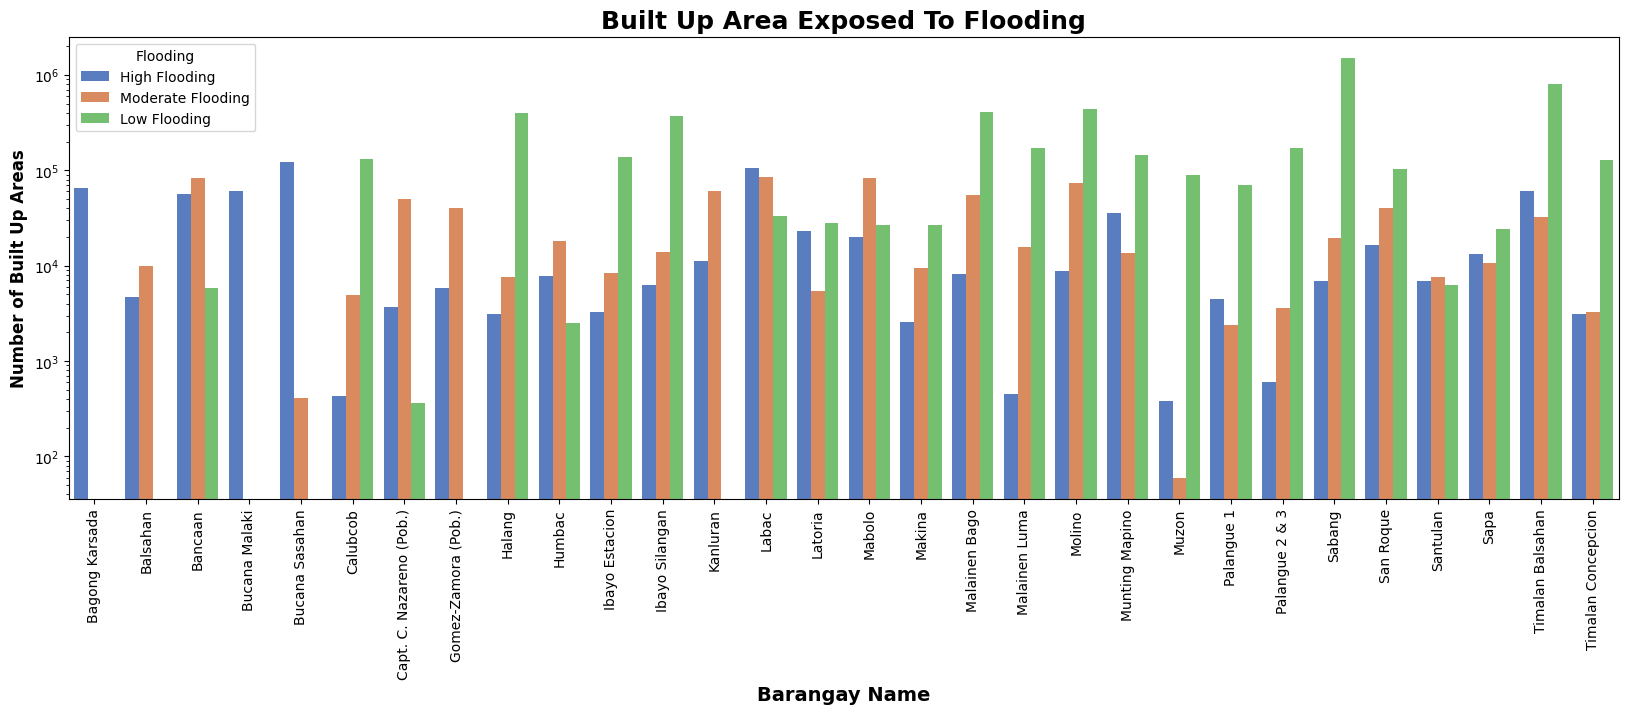

In [65]:
naic_bu_melt = naic_bu.melt(id_vars='Barangay Name',value_vars=['BU_HF', 'BU_MF', 'BU_LF'], var_name='built_up', value_name='value')

plt.figure(figsize=(20,6))

ax = sns.barplot(data=naic_bu_melt, x='Barangay Name', y='value', hue='built_up', palette='muted')


new_labels = ['High Flooding', 'Moderate Flooding', 'Low Flooding']


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, new_labels, title='Flooding')

plt.yscale('log')

plt.ylabel('Number of Built Up Areas', fontsize=12, fontweight='bold' )
plt.xlabel('Barangay Name', fontsize=14, fontweight='bold' )
plt.title('Built Up Area Exposed To Flooding', fontsize=18, fontweight='bold')

plt.xticks(rotation=90)


plt.show()

In [66]:
naic_bu_bgy = naic[['Barangay Name', 'BU_HF_BGY', 'BU_MF_BGY', 'BU_LF_BGY']]

naic_bu_bgy.dtypes

for column in naic_bu_bgy.select_dtypes(include='number').columns:
    naic_bu_bgy[column] = (naic_bu_bgy[column] * 100).round(2)
           

print("\nDataFrame with Percentage Columns:")
print(naic_bu_bgy.head())


DataFrame with Percentage Columns:
    Barangay Name  BU_HF_BGY  BU_MF_BGY  BU_LF_BGY
0  Bagong Karsada     100.00       0.00       0.00
1        Balsahan      32.57      67.43       0.00
2         Bancaan      39.11      56.85       4.04
3   Bucana Malaki     100.00       0.00       0.00
4  Bucana Sasahan      99.66       0.34       0.00


<ipython-input-66-3699f767da82>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naic_bu_bgy[column] = (naic_bu_bgy[column] * 100).round(2)


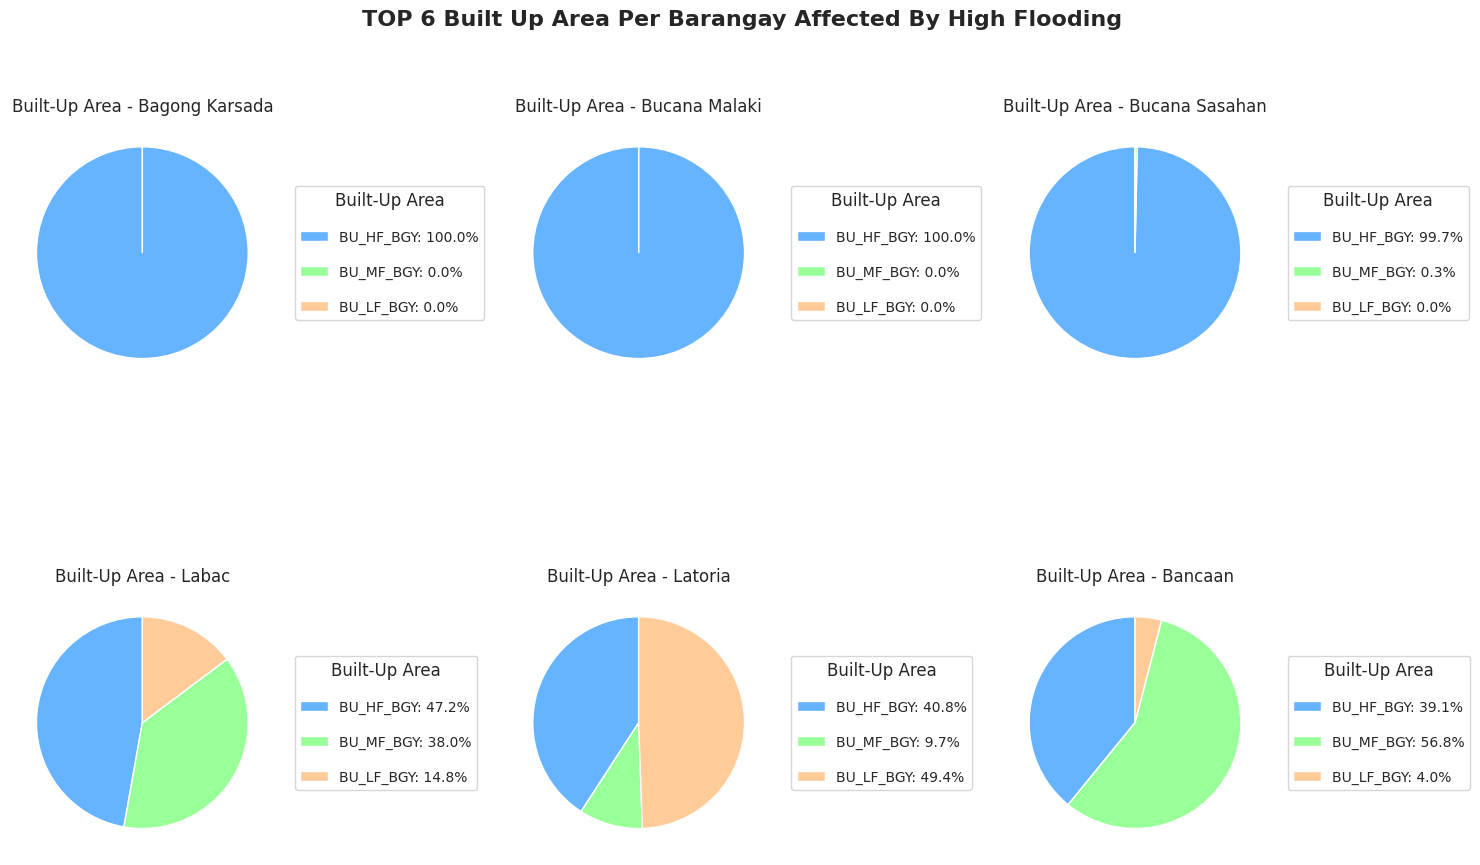

In [67]:
# TOP 6 HIGH FLOODING BARANGAY

naic_top_bgy = naic_bu_bgy.sort_values(by='BU_HF_BGY', ascending=False).head(6)


sns.set(style="whitegrid")


ncols = 3


nrows = (len(naic_top_bgy) + ncols - 1) // ncols  


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))


axes = axes.flatten()




for i, (index, row) in enumerate(naic_top_bgy.iterrows()):
  
    barangay_data = row[['BU_HF_BGY', 'BU_MF_BGY', 'BU_LF_BGY']]
    

    total = barangay_data.sum()
    percentages = (barangay_data / total) * 100
    
    
    wedges, texts = axes[i].pie(barangay_data, 
                                 startangle=90, 
                                 colors=['#66b3ff', '#99ff99', '#ffcc99'],
                                 pctdistance=0.85, 
                                 labeldistance=1.1)  
    

    axes[i].set_title(f"Built-Up Area - {row['Barangay Name']}")
    
  
    legend_labels = [f"{name}: {percentage:.1f}%" for name, percentage in zip(barangay_data.index, percentages)]
    
  
    axes[i].legend(wedges, legend_labels, title="Built-Up Area", loc="center left", 
                   bbox_to_anchor=(1.05, 0.5), labelspacing=1.5, fontsize=10)
    



for i in range(len(naic_bu_bgy), len(axes)):
    axes[i].axis('off')


fig.suptitle("TOP 6 Built Up Area Per Barangay Affected By High Flooding", fontsize=16, fontweight='bold', y=0.95)


plt.tight_layout()
plt.show()


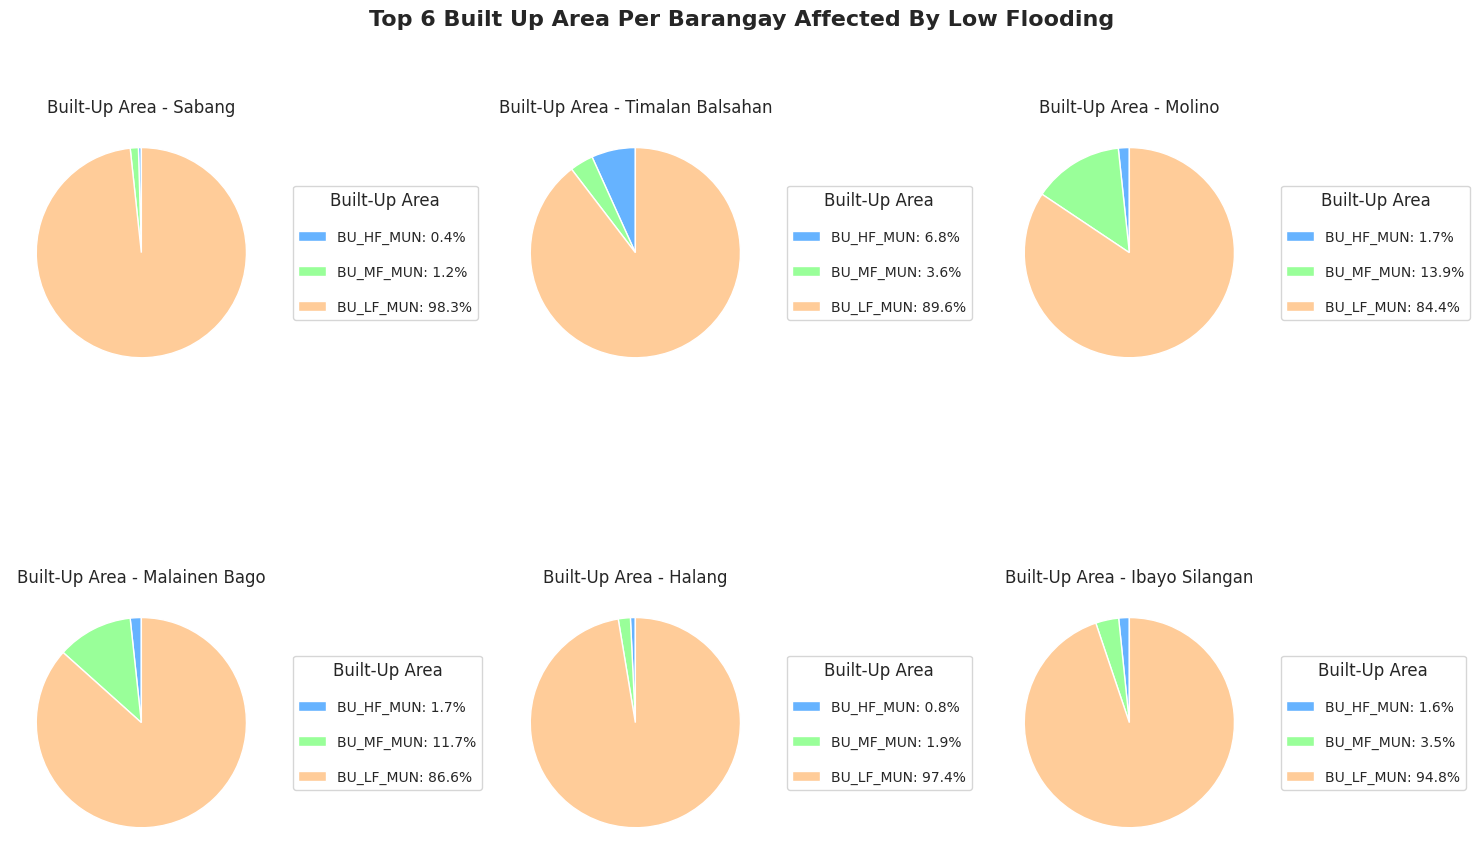

In [68]:
# TOP 6 LOW FLOODING MUNICIPALITY

naic_bu_mun = naic[['Barangay Name', 'BU_HF_MUN', 'BU_MF_MUN', 'BU_LF_MUN']]

naic_low_mun = naic_bu_mun.sort_values(by='BU_LF_MUN', ascending=False).head(6)

sns.set(style="whitegrid")


ncols = 3


nrows = (len(naic_low_mun) + ncols - 1) // ncols 


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))


axes = axes.flatten()




for i, (index, row) in enumerate(naic_low_mun.iterrows()):

    barangay_data = row[['BU_HF_MUN', 'BU_MF_MUN', 'BU_LF_MUN']]
    
  
    total = barangay_data.sum()
    percentages = (barangay_data / total) * 100
    
  
    wedges, texts = axes[i].pie(barangay_data, 
                                 startangle=90, 
                                 colors=['#66b3ff', '#99ff99', '#ffcc99'],
                                 pctdistance=0.85,  
                                 labeldistance=1.1)  
    

    axes[i].set_title(f"Built-Up Area - {row['Barangay Name']}")
    

    legend_labels = [f"{name}: {percentage:.1f}%" for name, percentage in zip(barangay_data.index, percentages)]
    
   
    axes[i].legend(wedges, legend_labels, title="Built-Up Area", loc="center left", 
                   bbox_to_anchor=(1.05, 0.5), labelspacing=1.5, fontsize=10)
    



for i in range(len(naic_bu_bgy), len(axes)):
    axes[i].axis('off')


fig.suptitle("Top 6 Built Up Area Per Barangay Affected By Low Flooding", fontsize=16, fontweight='bold', y=0.95)


plt.tight_layout()
plt.show()

# NAIC POPULATION SUSCEPTIBLE BY FLOODING

In [69]:
naic.columns

Index(['Barangay Name', 'Shape_Leng', 'Shape_Area', 'BU_Area', 'BU_HF',
       'BU_MF', 'BU_LF', 'BU_HF_BGY', 'BU_MF_BGY', 'BU_LF_BGY', 'BU_HF_MUN',
       'BU_MF_MUN', 'BU_LF_MUN', 'Urban/Rural', 'Population', 'POP_DEN',
       'POP_HF', 'POP_MF', 'POP_LF', 'POP_HF_BGY', 'POP_MF_BGY', 'POP_LF_BGY',
       'POP_HF_MUN', 'POP_MF_MUN', 'POP_LF_MUN', 'RD_HF', 'RD_MF', 'RD_LF',
       'Length_RD', 'RD_HF_BGY', 'RD_MF_BGY', 'RD_LF_BGY', 'RD_HF_MUN',
       'RD_MF_MUN', 'RD_LF_MUN'],
      dtype='object')

In [70]:
naic_pop = naic[['Barangay Name', 'POP_HF', 'POP_MF', 'POP_LF']]

naic_pop.head(5)

,Barangay Name,POP_HF,POP_MF,POP_LF
0,Bagong Karsada,2067.000633,0.000000,0.000000
1,Balsahan,137.455954,284.543525,0.000000
2,Bancaan,1891.223256,2749.155817,195.615911
3,Bucana Malaki,1356.001286,0.000000,0.000000
4,Bucana Sasahan,5939.788614,20.210796,0.000000


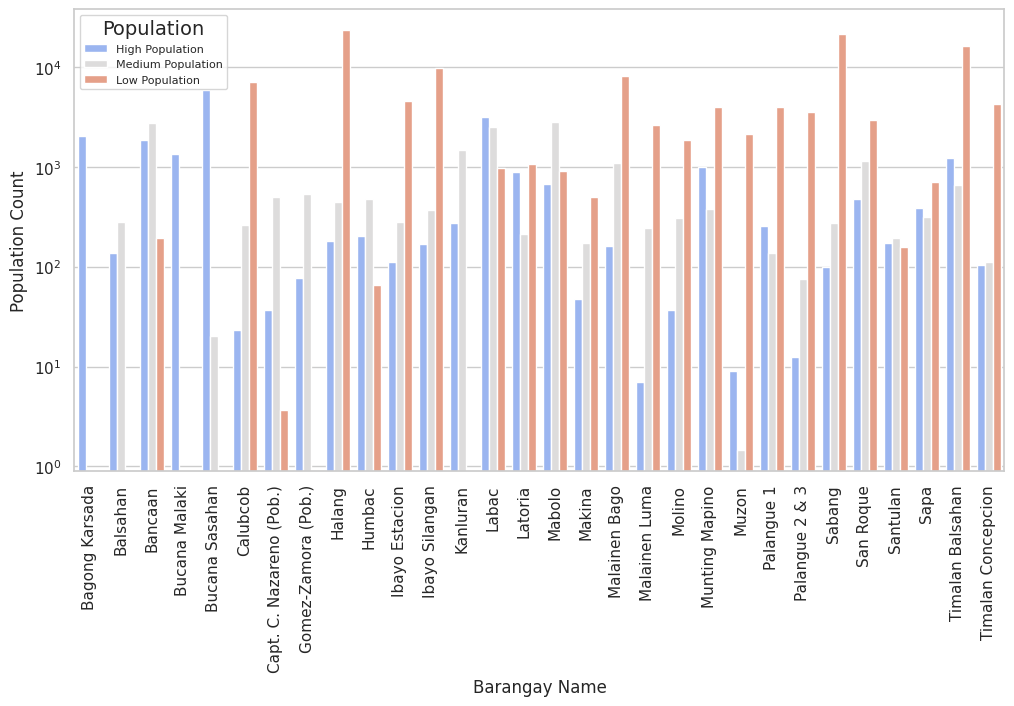

In [71]:
naic_pop_melted = naic_pop.melt(id_vars='Barangay Name', var_name='population', value_name='value')

plt.figure(figsize=(12,6))

ax = sns.barplot(data=naic_pop_melted, x='Barangay Name', y='value', hue='population', palette='coolwarm')


new_labels = ['High Population', 'Medium Population', 'Low Population']


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, new_labels, title='Population', fontsize=8, title_fontsize=14, loc='upper left', frameon=True)


plt.yscale('log')

plt.ylabel('Population Count')
plt.xlabel('Barangay Name')
plt.xticks(rotation=90)

plt.show()


In [72]:
naic_top_pop_bgy = naic[['Barangay Name', 'POP_HF_BGY', 'POP_MF_BGY', 'POP_LF_BGY']].sort_values(by='POP_HF_BGY', ascending=False).head(6)

naic_top_pop_bgy

,Barangay Name,POP_HF_BGY,POP_MF_BGY,POP_LF_BGY
3,Bucana Malaki,1.000001,0.000000,0.000000
0,Bagong Karsada,1.000000,0.000000,0.000000
4,Bucana Sasahan,0.996609,0.003391,0.000000
13,Labac,0.472117,0.380284,0.147602
14,Latoria,0.408463,0.097066,0.494471
2,Bancaan,0.391072,0.568477,0.040450


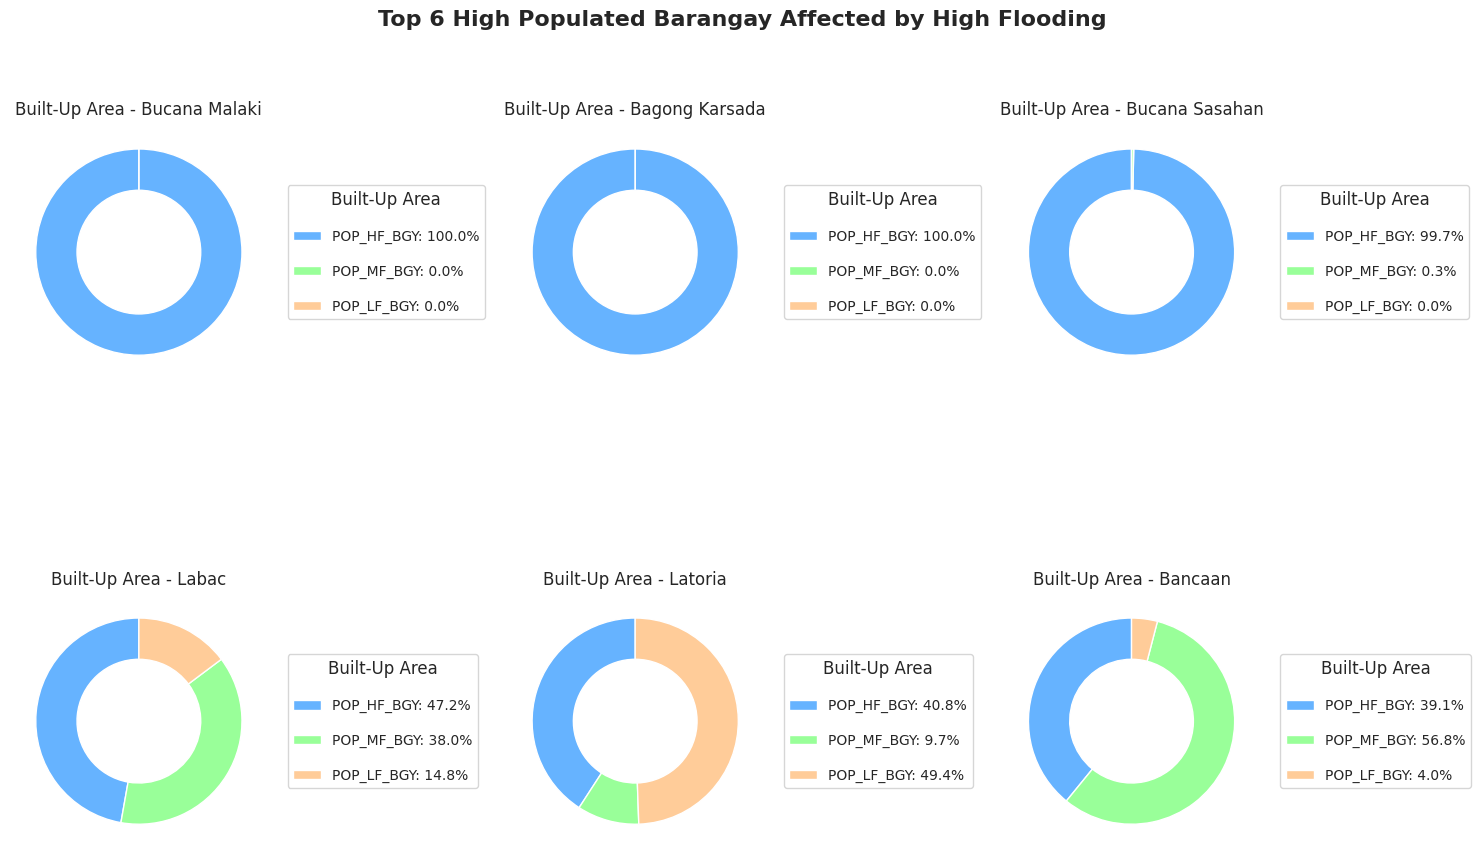

In [73]:
# Top 6 High Populated Barangay Affected by High Flooding

naic_top_pop_bgy = naic[['Barangay Name', 'POP_HF_BGY', 'POP_MF_BGY', 'POP_LF_BGY']].sort_values(by='POP_HF_BGY', ascending=False).head(6)

naic_top_pop_bgy

sns.set(style="whitegrid")


ncols = 3


nrows = (len(naic_top_pop_bgy) + ncols - 1) // ncols  


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))


axes = axes.flatten()


for i, (index, row) in enumerate(naic_top_pop_bgy.iterrows()):

    barangay_data = row[['POP_HF_BGY', 'POP_MF_BGY', 'POP_LF_BGY']]
    

    total = barangay_data.sum()
    percentages = (barangay_data / total) * 100
    

    wedges, texts = axes[i].pie(barangay_data, 
                                 startangle=90, 
                                 colors=['#66b3ff', '#99ff99', '#ffcc99'],
                                 pctdistance=0.85,  
                                 labeldistance=1.1,  
                                 wedgeprops={'width': 0.4}) 
    

    axes[i].set_title(f"Built-Up Area - {row['Barangay Name']}")
    

    legend_labels = [f"{name}: {percentage:.1f}%" for name, percentage in zip(barangay_data.index, percentages)]
    

    axes[i].legend(wedges, legend_labels, title="Built-Up Area", loc="center left", 
                   bbox_to_anchor=(1.05, 0.5), labelspacing=1.5, fontsize=10)


for i in range(len(naic_bu_bgy), len(axes)):
    axes[i].axis('off')


fig.suptitle("Top 6 High Populated Barangay Affected by High Flooding", fontsize=16, fontweight='bold', y=0.95)


plt.subplots_adjust(hspace=0.3, wspace=0.3)  


plt.tight_layout()
plt.show()



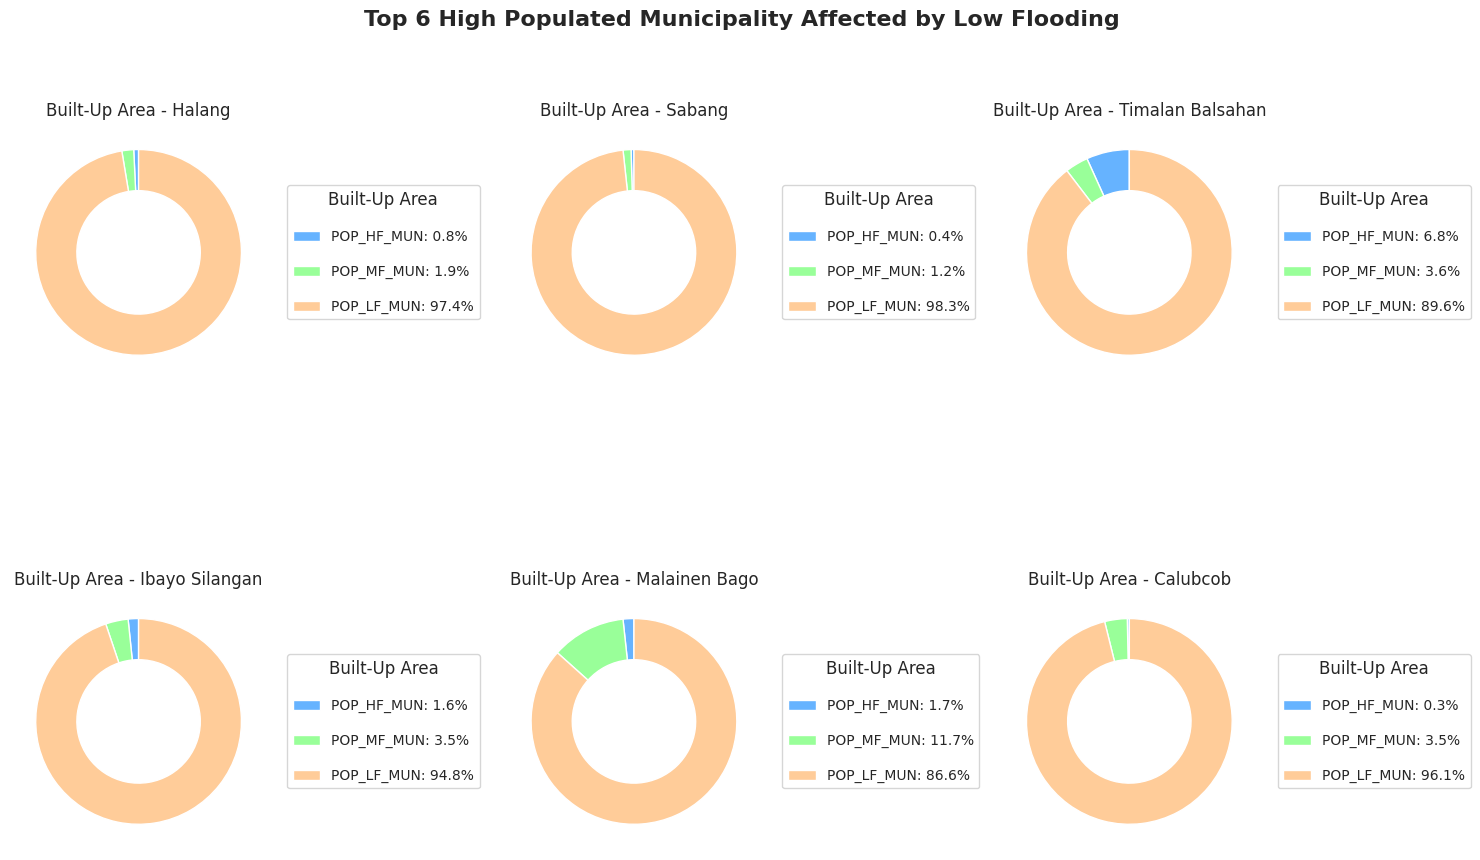

In [74]:
# Top 6 High Populated Municipality Affected by Low Flooding

naic_top_pop_mun = naic[['Barangay Name', 'POP_HF_MUN', 'POP_MF_MUN', 'POP_LF_MUN']].sort_values(by='POP_LF_MUN', ascending=False).head(6)

naic_top_pop_mun

sns.set(style="whitegrid")

ncols = 3


nrows = (len(naic_top_pop_mun) + ncols - 1) // ncols  


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))


axes = axes.flatten()


for i, (index, row) in enumerate(naic_top_pop_mun.iterrows()):

    barangay_data = row[['POP_HF_MUN', 'POP_MF_MUN', 'POP_LF_MUN']]
    

    total = barangay_data.sum()
    percentages = (barangay_data / total) * 100
    
  
    wedges, texts = axes[i].pie(barangay_data, 
                                 startangle=90, 
                                 colors=['#66b3ff', '#99ff99', '#ffcc99'],
                                 pctdistance=0.85,  
                                 labeldistance=1.1,  
                                 wedgeprops={'width': 0.4}) 
    

    axes[i].set_title(f"Built-Up Area - {row['Barangay Name']}")
    
  
    legend_labels = [f"{name}: {percentage:.1f}%" for name, percentage in zip(barangay_data.index, percentages)]
    

    axes[i].legend(wedges, legend_labels, title="Built-Up Area", loc="center left", 
                   bbox_to_anchor=(1.05, 0.5), labelspacing=1.5, fontsize=10)


for i in range(len(naic_bu_bgy), len(axes)):
    axes[i].axis('off')


fig.suptitle("Top 6 High Populated Municipality Affected by Low Flooding", fontsize=16, fontweight='bold', y=0.95)


plt.subplots_adjust(hspace=0.3, wspace=0.3)


plt.tight_layout()
plt.show()

# Population Per Barangay in Rural or Urban

In [75]:

naic_ur = naic[['Barangay Name', 'Urban/Rural', 'POP_HF', 'POP_MF', 'POP_LF']]


naic_ur_melted = naic_ur.melt(id_vars=['Barangay Name', 'Urban/Rural'],
                              value_vars=['POP_HF', 'POP_MF', 'POP_LF'],
                              var_name='Housing Type', value_name='Value')


naic_ur_cross = pd.crosstab(index=naic_ur_melted['Barangay Name'],
                             columns=naic_ur_melted['Urban/Rural'],
                             values=naic_ur_melted['Value'],
                             aggfunc='sum', 
                             margins=True)     

print(naic_ur_cross)


Urban/Rural                      Rural          Urban            All
Barangay Name                                                       
Bagong Karsada             2067.000633            NaN    2067.000633
Balsahan                    421.999479            NaN     421.999479
Bancaan                    4835.994983            NaN    4835.994983
Bucana Malaki              1356.001286            NaN    1356.001286
Bucana Sasahan                     NaN    5959.999410    5959.999410
Calubcob                           NaN    7391.006485    7391.006485
Capt. C. Nazareno (Pob.)    543.000044            NaN     543.000044
Gomez-Zamora (Pob.)         615.000159            NaN     615.000159
Halang                             NaN   24195.019443   24195.019443
Humbac                      744.998748            NaN     744.998748
Ibayo Estacion                     NaN    5056.999559    5056.999559
Ibayo Silangan                     NaN   10540.982977   10540.982977
Kanluran                   1763.00

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


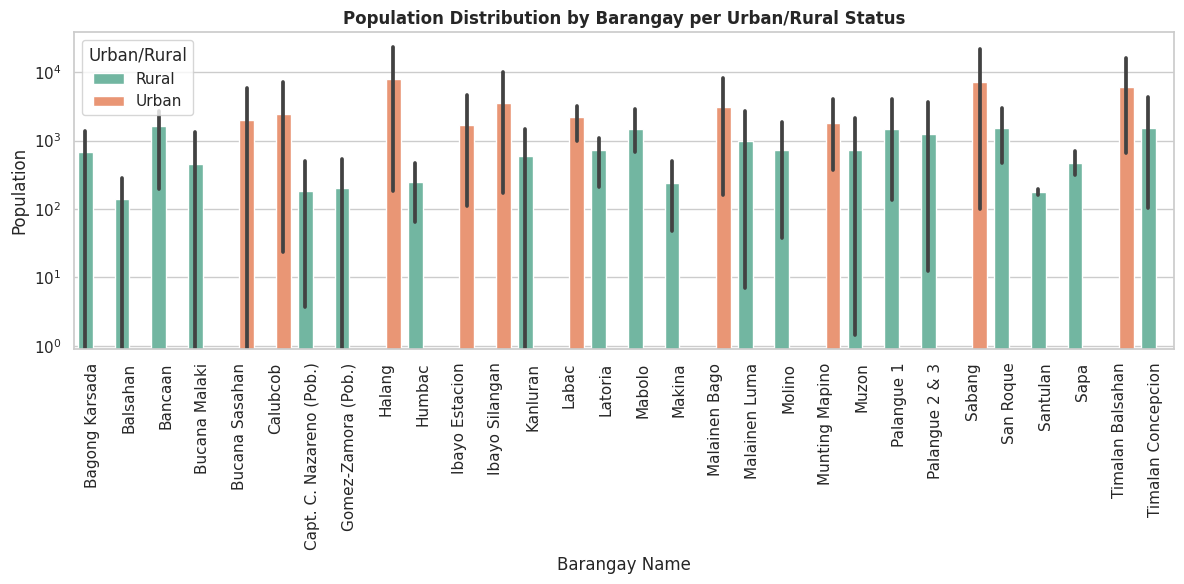

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Barangay Name', y='Value', hue='Urban/Rural', data=naic_ur_melted, palette='Set2')

plt.yscale('log')

plt.xticks(rotation=90) 
plt.title("Population Distribution by Barangay per Urban/Rural Status", fontweight='bold')
plt.xlabel("Barangay Name")
plt.ylabel("Population")
plt.tight_layout() 
plt.show()